In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/KaggleData/

BreaKHis_v1  credentials.json  Folds.csv  HIST


In [ ]:
!ls /content/drive/MyDrive/KaggleData/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign

adenosis.stat.txt      phyllodes_tumor.stat.txt  README_B.txt  tubular_adenoma.stat.txt
fibroadenoma.stat.txt  process_db_stat.py	 SOB


In [ ]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(f'{len(gpus)} Physical GPUs, {len(logical_gpus)} Logical GPU')
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
else:
    print("No GPU found, training will default to CPU.")

1 Physical GPUs, 1 Logical GPU


In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os
import shutil
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

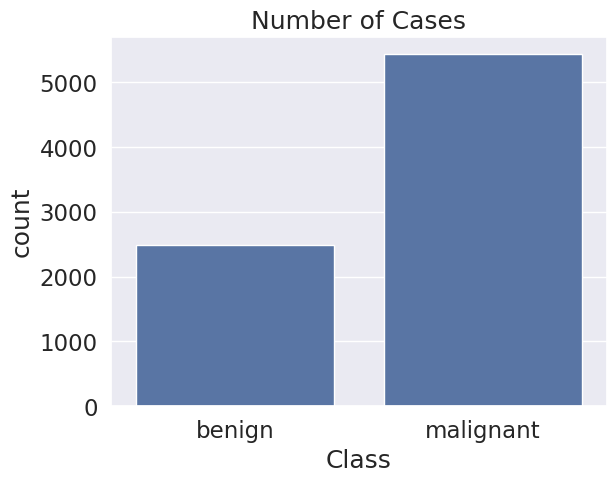

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'label' is a categorical column in your DataFrame
# If it's not, you might need to replace 'label' with the actual column name.
sns.set(font_scale=1.5)
sns.set_style("darkgrid")

# Assuming 'dataset' is your DataFrame
sns.countplot(data=dataset, x="label")
plt.xlabel("Class")
plt.title("Number of Cases")
plt.show()


In [ ]:
print('Number of samples for each class: \n', dataset["class"].value_counts())

Number of samples for each class: 
 1    5429
0    2480
Name: class, dtype: int64


**Extracting images from the folders**

In [ ]:
#Check number of images in each folder
path = "/content/drive/MyDrive/KaggleData/Image_Dataset"
dir_list = [os.path.join(path,i) for i in os.listdir(path)]
size_dict = {}
for i,value in enumerate(dir_list):
    size_dict[os.listdir(path)[i]] = len(os.listdir(value))
size_dict

{'Benign': 2480, 'Malignant': 5429}

In [ ]:
#Function to read the dataset from a specified directory
def import_images(folder,target):
    images = []
    for item in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,item), cv2.IMREAD_COLOR)
        img = cv2.resize(img, (224, 224))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if img is not None:
            images.append([img,target])
    return images

In [ ]:
#Importing the dataset from the specified directory using the created function and assign them with labels
#Where 0 is for Benign, 1 is malignant and 1 is for Malignant
benign = import_images("/content/drive/MyDrive/KaggleData/Image_Dataset/Benign",0)
malignant = import_images("/content/drive/MyDrive/KaggleData/Image_Dataset/Malignant",1)

In [ ]:
full_data = benign + malignant

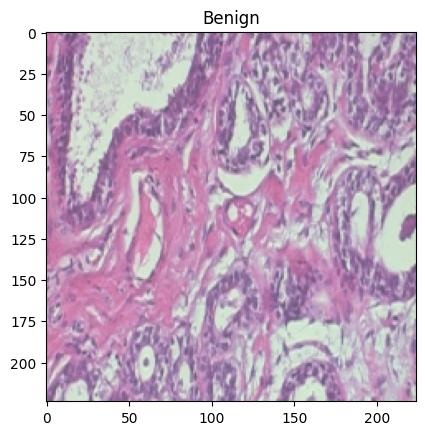

In [ ]:
#Plotting the benign sample
plt.title('Benign')
plt.imshow(benign[0][0])

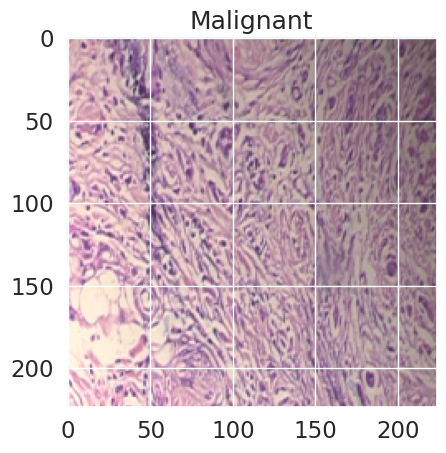

In [ ]:
#Here is a sample of an image in the dataset
plt.title('Malignant')
plt.imshow(malignant[0][0])

In [ ]:
# #Performing the dataset splitting into training and test set
training_data, test_dataset = train_test_split(full_data, test_size = 0.1, random_state = 30)
# #Extracting validation dataset from the training data
training_dataset, val_dataset = train_test_split(training_data, test_size = 0.1, random_state = 30)

In [ ]:
"""Function to separate the dataset into images and label puting the images in array called feature_map and labels into
array called label"""

def split_data(main_data):
    feature_matrix = []
    label = []
    for x,y in main_data:
        feature_matrix.append(x)
        label.append(y)
    return np.array(feature_matrix), np.array(label)

In [ ]:
print("Training data size:", len(training_data))
print("Validation data size:", len(val_dataset))
print("Test data size:", len(test_dataset))

Training data size: 7118
Validation data size: 712
Test data size: 791


# **Extracting Training dataset**

In [ ]:
#Extract validation images and labels
training_images, training_labels = split_data(training_dataset)

In [ ]:
# Normalize images
training_images = np.array(training_images, dtype="float") / 255.0

In [ ]:
#The shape of the datasets
print(training_images.shape)
print(training_labels.shape)

(6406, 224, 224, 3)
(6406,)


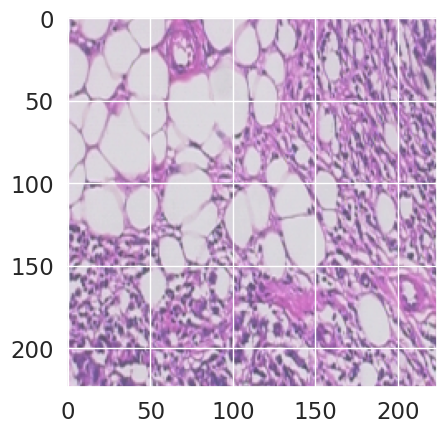

In [ ]:
#The first image as a picture
plt.imshow(training_images[0])

In [ ]:
#The first label in the dataset
training_labels[0]

0

In [ ]:
#Check the data distribution among the classes
print(pd.Series(training_labels).value_counts())

1    4379
0    2027
dtype: int64


# **Extracting Test dataset**

In [ ]:
#Extract validation images and labels
test_images, test_labels = split_data(test_dataset)

In [ ]:
# Normalize images
test_images = np.array(test_images, dtype="float") / 255.0

In [ ]:
#The shape of the datasets
print(test_images.shape)
print(test_labels.shape)

(791, 224, 224, 3)
(791,)


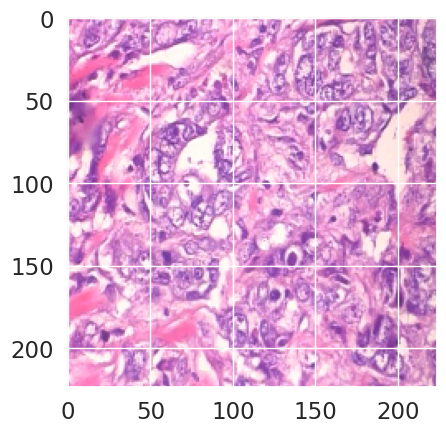

In [ ]:
#The first image as a picture
plt.imshow(test_images[0])

In [ ]:
#The first label in the dataset
test_labels[0]

1

In [ ]:
#Check the data distribution among the classes
print(pd.Series(test_labels).value_counts())

1    547
0    244
dtype: int64


# **Extracting Validation dataset**

In [ ]:
#Extract validation images and labels
val_images, val_labels = split_data(val_dataset)

In [ ]:
import numpy as np
# Normalize images
val_images = np.array(val_images, dtype="float") / 255.0

In [ ]:
#The shape of the datasets
print(val_images.shape)
print(val_labels.shape)

(712, 224, 224, 3)
(712,)


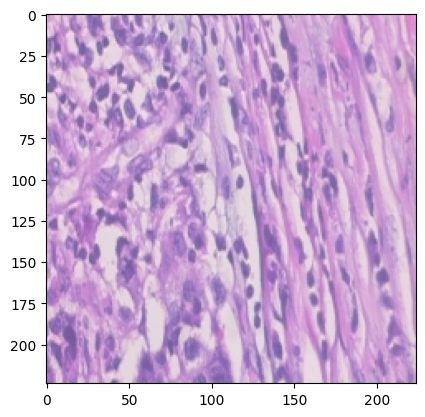

In [ ]:
#The first image as a picture
plt.imshow(val_images[0])

In [ ]:
#The first label in the dataset
val_labels[0]

1

In [ ]:
#Check the data distribution among the classes
print(pd.Series(val_labels).value_counts())

1    489
0    223
dtype: int64


Focal Loss FUNCTION




In [ ]:
!pip install tensorflow-addons


# Model Training

In [ ]:
print("Training data size:", len(training_data))
print("Validation data size:", len(val_dataset))
print("Test data size:", len(test_dataset))

Training data size: 7118
Validation data size: 712
Test data size: 791


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 111, 111, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 55, 55, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 55, 55, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 27, 27, 128)       0

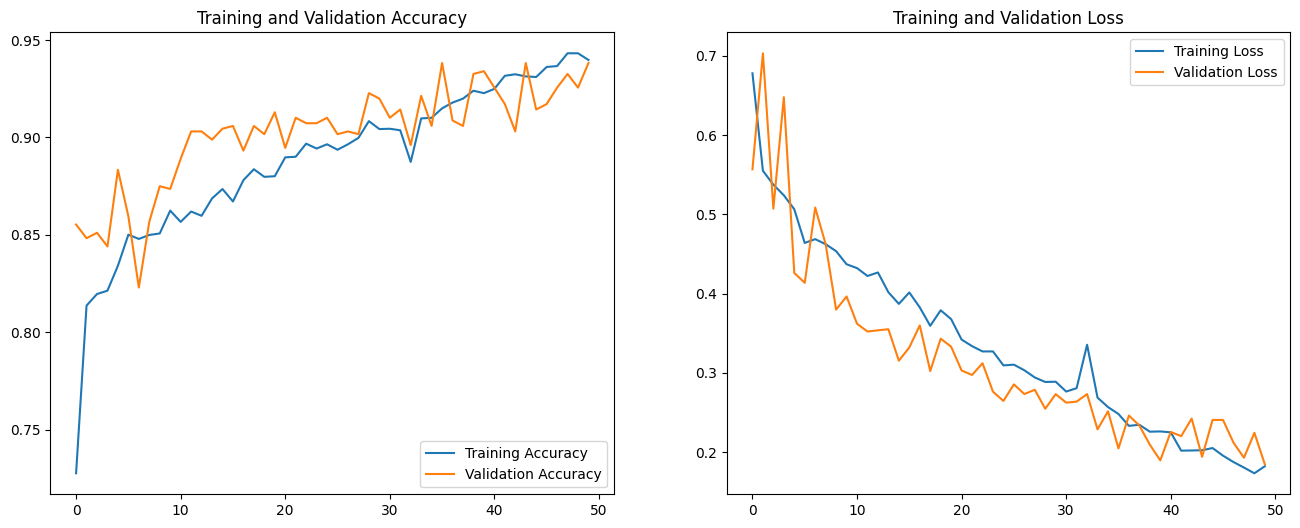

In [ ]:
#Importing libraries needed for the modeling and training
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping, Callback , ModelCheckpoint
from tensorflow.keras.metrics import Accuracy,binary_crossentropy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
import tensorflow as tf

def LDAM_loss_binary(labels, predictions, class_margin):

    """
    Define LDAM loss function for binary classification.

    :param labels: True labels, shape = (batch_size, 1)
    :param predictions: Predicted labels, shape = (batch_size, 1)
    :param class_margin: Margin for the minority class
    :return: LDAM loss for binary classification
    """
    # Ensure predictions are clipped to avoid log(0)
    epsilon = 1e-7
    predictions = tf.clip_by_value(predictions, epsilon, 1 - epsilon)


    # Cast labels to float32 to match other elements
    labels = tf.cast(labels, tf.float32)

    # Calculate the loss
    loss = - (labels * tf.math.log(predictions) * (1 + class_margin) + (1 - labels) * tf.math.log(1 - predictions))

    return tf.reduce_mean(loss)



# Determine the appropriate margin for your dataset
# This value needs experimentation; start with a small value and adjust based on performance
class_margin = 0.6



#Setting the batch size for the cnn model
bs = 64

#Defining Image Data Generator for image augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    fill_mode='nearest',
    zoom_range=0.2)

#Defining the base model
cancer_model = Sequential()

#First Layer
cancer_model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (224,224,3), activation = 'relu'))
cancer_model.add(MaxPooling2D(pool_size = (2,2)))

#Second Layer
cancer_model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same',activation = 'relu'))
cancer_model.add(MaxPooling2D(pool_size = (2,2)))

#Third Layer
cancer_model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu'))
cancer_model.add(MaxPooling2D(pool_size = (2,2)))
cancer_model.add(Dropout(0.4))

#Fourth Layer
cancer_model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'relu'))
cancer_model.add(MaxPooling2D(pool_size = (2,2)))
cancer_model.add(Dropout(0.2))

#Fifth Layer
cancer_model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'relu'))
cancer_model.add(MaxPooling2D(pool_size = (2,2)))

#Flattening the layers
cancer_model.add(Flatten())

#Adding the dense layer
cancer_model.add(Dense(256, activation = 'relu'))
cancer_model.add(Dense(128, activation = 'relu'))
cancer_model.add(Dense(1, activation = 'sigmoid'))

cancer_model.summary()

#Setting the learning rate to reduce gradually over the training period
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=20*50,
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)


# Compile your model using the custom LDAM loss for binary classification
cancer_model.compile(optimizer=get_optimizer(),
                     loss=lambda labels, predictions: LDAM_loss_binary(labels, predictions, class_margin=tf.constant(class_margin, dtype=tf.float32)),
                     metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss',patience=5)
# checkpoint = ModelCheckpoint("./Best_model/",save_best_only=True,)
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)

#Fitted the model on the training and and validation dataset using the image augmentor for 50 epochs
# history = cancer_model.fit(datagen.flow(training_images, training_labels, batch_size = bs),
#                                validation_data=datagen.flow(val_images, val_labels),
#                                epochs=50,
#                                callbacks=[rlrp],
#                                verbose=1,
#                                class_weight=class_weights_dict)

#Fitted the model on the training and validation dataset using the image augmentor for 50 epochs
history = cancer_model.fit(datagen.flow(training_images, training_labels, batch_size = bs),
                           validation_data=datagen.flow(val_images, val_labels),
                           epochs=50,
                           callbacks=[rlrp],
                           verbose=1)


#Plotting the model results

#Getting the accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#Getting the losses
loss = history.history['loss']
val_loss = history.history['val_loss']

#No of epochs it trained
epochs_range = history.epoch

#Plotting Training and Validation accuracy
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

performance Metrics

In [1]:
y_pred = cancer_model.predict(test_images)
print(y_pred)



NameError: name 'cancer_model' is not defined

In [2]:
#Round up model prediction to 0 and 1 and convert result to an array
rounded = [float(np.round(x)) for x in y_pred]
rounded_predictions = np.asarray(rounded).astype(int)
print(rounded_predictions)



NameError: name 'y_pred' is not defined

In [ ]:
#Round up model prediction to 0 and 1 and convert result to an array
rounded = [float(np.round(x)) for x in y_pred]
rounded_predictions = np.asarray(rounded).astype(int)
print(rounded_predictions)



In [3]:
#Classification report
print(classification_report(test_labels, rounded_predictions))


NameError: name 'classification_report' is not defined

In [4]:
#Confusion matrix
cm = confusion_matrix(test_labels, rounded_predictions)
print(cm)



NameError: name 'confusion_matrix' is not defined

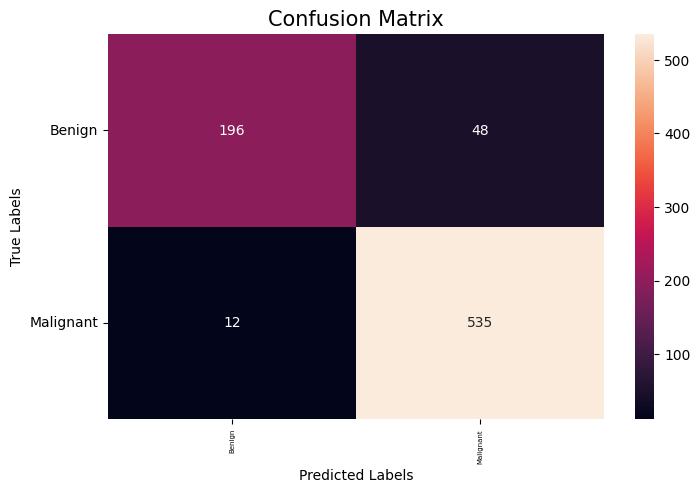

Accuracy: 0.924147
Precision: 0.917667
Recall: 0.978062
Specificity: 0.803279
F1_score: 0.946903


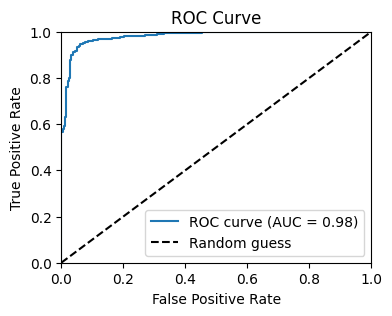

In [ ]:
import seaborn as sns

#Setting the labels
labels = ['Benign', 'Malignant']

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted Labels', fontsize=10)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 5)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=10)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=15)

plt.savefig('ConMat24.png')
plt.show()

#Accuracy
accuracy = accuracy_score(test_labels, rounded_predictions)
print('Accuracy: %f' % accuracy)
#Precision
precision = precision_score(test_labels, rounded_predictions)
print('Precision: %f' % precision)
# Recall
recall = recall_score(test_labels, rounded_predictions, pos_label=1)
print('Recall: %f' % recall)
#Specificity
specificity = recall_score(test_labels, rounded_predictions, pos_label=0)
print('Specificity: %f' % specificity)
#F1-score
F1_score = f1_score(test_labels, rounded_predictions)
print('F1_score: %f' % F1_score)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Compute AUC score
roc_auc = roc_auc_score(test_labels, y_pred)
fpr, tpr, thresholds = roc_curve(test_labels, y_pred[:, 0])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Accuracy
accuracy = accuracy_score(test_labels, rounded_predictions)
print('Accuracy: %f' % accuracy)


Accuracy: 0.924147


In [ ]:
#Precision
precision = precision_score(test_labels, rounded_predictions)
print('Precision: %f' % precision)


Precision: 0.917667


In [ ]:
# Recall
recall = recall_score(test_labels, rounded_predictions, pos_label=1)
print('Recall: %f' % recall)


Recall: 0.978062


In [ ]:
#Specificity
specificity = recall_score(test_labels, rounded_predictions, pos_label=0)
print('Specificity: %f' % specificity)


Specificity: 0.803279


In [ ]:
#F1-score
F1_score = f1_score(test_labels, rounded_predictions)
print('F1_score: %f' % F1_score)

F1_score: 0.946903


# ROC CURVE

In [ ]:
print("test_labels shape:", test_labels.shape)
print("y_pred shape:", y_pred.shape)

test_labels shape: (791,)
y_pred shape: (791, 1)


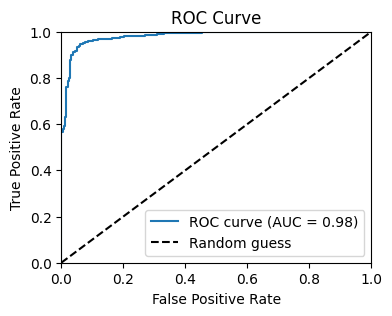

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Compute AUC score
roc_auc = roc_auc_score(test_labels, y_pred)
fpr, tpr, thresholds = roc_curve(test_labels, y_pred[:, 0])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()